In [1]:
import keras
keras.__version__

'2.12.0'

# Prediciendo precios de habitaciones de hoteles

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('TABLA.csv', delimiter=';')
df

,Cod_H,Nomho,Prov,Ciudad,CCAA,Kimc,Estrellas,Reseñas,Pisc,Park,Ref,M2,Camas,Terraza,Precio,Aire,Wifi
0,67,THC Gran Via Hostel,Madrid,Madrid,Comunidad de Madrid,MC,1,MALO,NO,NO,"0,6",11,1D,NO,65,SI,SI
1,4061,San Antonio El Real,Segovia,Segovia,Castilla y León,MC,4,REGULAR,NO,SI,"2,8",34,1D/2I,SI,101,SI,SI
2,4076,Hotel Parador de Ávila,Ávila,Ávila,Castilla y León,RC,4,REGULAR,SI,SI,"2,5",16,1D,SI,100,SI,SI
3,4046,Palacio de Los Velada,Ávila,Ávila,Castilla y León,RC,4,REGULAR,SI,SI,"3,2",32,1D,NO,62,SI,NO
4,4090,Hotel Don Rodrigo,Palencia,Palencia,Castilla y León,RC,2,REGULAR,NO,SI,"3,5",12,1D,NO,55,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4033,Áurea Convento Capuchinos,Segovia,Segovia,Castilla y León,ML,5,MUY BUENO,SI,SI,"5,7",59,1D/2I,SI,135,SI,SI
419,1028,Hotel Ca S'Arader Turismo de Interior,Menorca,Ciudadela,Islas Baleares,MC,3,MUY BUENO,NO,SI,"1,1",23,1D/2I,NO,363,SI,SI
420,1091,Rosamar Ibiza Hotel Only Adults,Ibiza,San Antonio,Islas Baleares,RC,3,MUY BUENO,SI,SI,0,20,1D/2I,SI,180,SI,SI
421,4047,Real Monasterio San Zoilos,León,Carrión de los Condes,Castilla y León,RC,4,MUY BUENO,SI,SI,"5,6",31,1D,NO,83,SI,SI


In [4]:
df = df.drop('Cod_H', axis=1)
df

,Nomho,Prov,Ciudad,CCAA,Kimc,Estrellas,Reseñas,Pisc,Park,Ref,M2,Camas,Terraza,Precio,Aire,Wifi
0,THC Gran Via Hostel,Madrid,Madrid,Comunidad de Madrid,MC,1,MALO,NO,NO,"0,6",11,1D,NO,65,SI,SI
1,San Antonio El Real,Segovia,Segovia,Castilla y León,MC,4,REGULAR,NO,SI,"2,8",34,1D/2I,SI,101,SI,SI
2,Hotel Parador de Ávila,Ávila,Ávila,Castilla y León,RC,4,REGULAR,SI,SI,"2,5",16,1D,SI,100,SI,SI
3,Palacio de Los Velada,Ávila,Ávila,Castilla y León,RC,4,REGULAR,SI,SI,"3,2",32,1D,NO,62,SI,NO
4,Hotel Don Rodrigo,Palencia,Palencia,Castilla y León,RC,2,REGULAR,NO,SI,"3,5",12,1D,NO,55,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Áurea Convento Capuchinos,Segovia,Segovia,Castilla y León,ML,5,MUY BUENO,SI,SI,"5,7",59,1D/2I,SI,135,SI,SI
419,Hotel Ca S'Arader Turismo de Interior,Menorca,Ciudadela,Islas Baleares,MC,3,MUY BUENO,NO,SI,"1,1",23,1D/2I,NO,363,SI,SI
420,Rosamar Ibiza Hotel Only Adults,Ibiza,San Antonio,Islas Baleares,RC,3,MUY BUENO,SI,SI,0,20,1D/2I,SI,180,SI,SI
421,Real Monasterio San Zoilos,León,Carrión de los Condes,Castilla y León,RC,4,MUY BUENO,SI,SI,"5,6",31,1D,NO,83,SI,SI


In [5]:
df.columns = ["Hotel", "Provincia", "Ciudad", "CCAA",
                 "Km Ciudad", "Estrellas", "Resenas", 
                 "Piscina", "Parking", "Punto de interés", "M^2",
                 "Tipo de cama", "Terraza", "Precio",
                 "Aire", "Wifi"]
df

,Hotel,Provincia,Ciudad,CCAA,Km Ciudad,Estrellas,Resenas,Piscina,Parking,Punto de interés,M^2,Tipo de cama,Terraza,Precio,Aire,Wifi
0,THC Gran Via Hostel,Madrid,Madrid,Comunidad de Madrid,MC,1,MALO,NO,NO,"0,6",11,1D,NO,65,SI,SI
1,San Antonio El Real,Segovia,Segovia,Castilla y León,MC,4,REGULAR,NO,SI,"2,8",34,1D/2I,SI,101,SI,SI
2,Hotel Parador de Ávila,Ávila,Ávila,Castilla y León,RC,4,REGULAR,SI,SI,"2,5",16,1D,SI,100,SI,SI
3,Palacio de Los Velada,Ávila,Ávila,Castilla y León,RC,4,REGULAR,SI,SI,"3,2",32,1D,NO,62,SI,NO
4,Hotel Don Rodrigo,Palencia,Palencia,Castilla y León,RC,2,REGULAR,NO,SI,"3,5",12,1D,NO,55,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Áurea Convento Capuchinos,Segovia,Segovia,Castilla y León,ML,5,MUY BUENO,SI,SI,"5,7",59,1D/2I,SI,135,SI,SI
419,Hotel Ca S'Arader Turismo de Interior,Menorca,Ciudadela,Islas Baleares,MC,3,MUY BUENO,NO,SI,"1,1",23,1D/2I,NO,363,SI,SI
420,Rosamar Ibiza Hotel Only Adults,Ibiza,San Antonio,Islas Baleares,RC,3,MUY BUENO,SI,SI,0,20,1D/2I,SI,180,SI,SI
421,Real Monasterio San Zoilos,León,Carrión de los Condes,Castilla y León,RC,4,MUY BUENO,SI,SI,"5,6",31,1D,NO,83,SI,SI


In [6]:
df['Precio'] = df['Precio'].apply(lambda x: float(x.replace(',', '.')))
df['Punto de interés'] = df['Punto de interés'].apply(lambda x: float(x.replace(',', '.')))


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hotel             423 non-null    object 
 1   Provincia         423 non-null    object 
 2   Ciudad            423 non-null    object 
 3   CCAA              423 non-null    object 
 4   Km Ciudad         423 non-null    object 
 5   Estrellas         423 non-null    int64  
 6   Resenas           423 non-null    object 
 7   Piscina           423 non-null    object 
 8   Parking           423 non-null    object 
 9   Punto de interés  423 non-null    float64
 10  M^2               423 non-null    int64  
 11  Tipo de cama      423 non-null    object 
 12  Terraza           423 non-null    object 
 13  Precio            423 non-null    float64
 14  Aire              423 non-null    object 
 15  Wifi              423 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory u

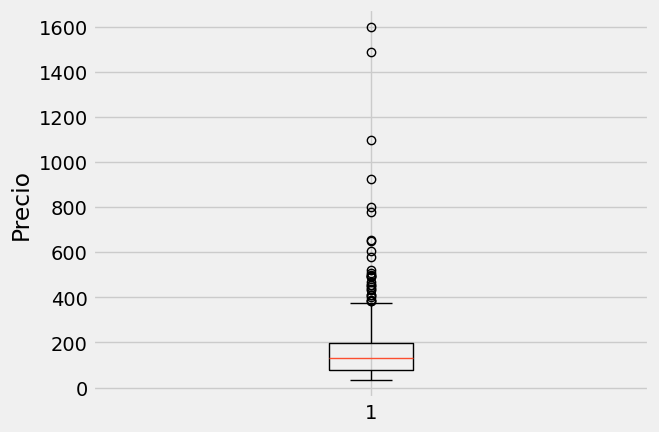

In [8]:
plt.boxplot(df['Precio'])

# Etiqueta del eje y
plt.ylabel('Precio')

# Mostrar el diagrama de caja
plt.show()

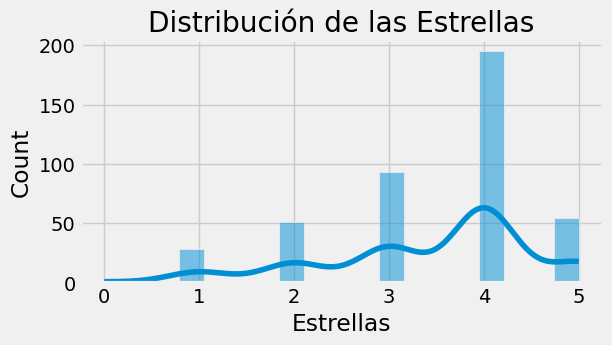

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='Estrellas', kde=True,ax=ax)
ax.set_title("Distribución de las Estrellas")
ax.set_xlabel('Estrellas');

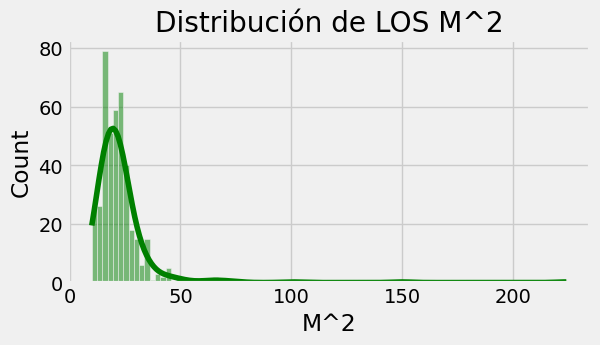

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='M^2', kde=True,color='green',ax=ax)
ax.set_title("Distribución de LOS M^2")
ax.set_xlabel('M^2');

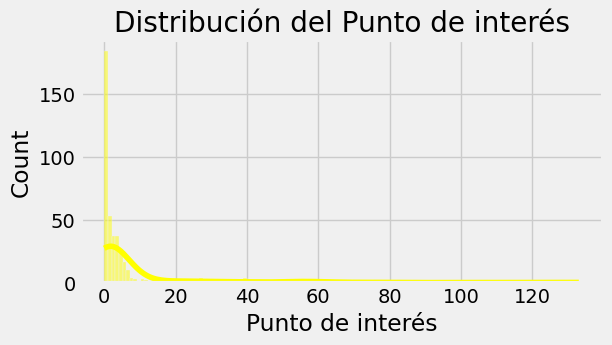

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='Punto de interés', kde=True,color='yellow',ax=ax)
ax.set_title("Distribución del Punto de interés")
ax.set_xlabel('Punto de interés');

Text(0.5, 0, 'Precio')

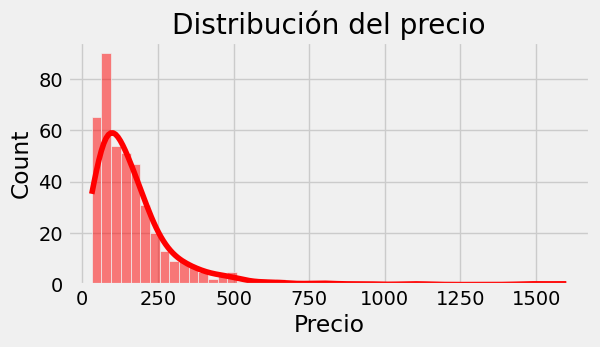

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='Precio', kde=True, color='red', ax=ax)
ax.set_title("Distribución del precio")
ax.set_xlabel('Precio')

In [13]:
df.select_dtypes(include=['object']).describe()

,Hotel,Provincia,Ciudad,CCAA,Km Ciudad,Resenas,Piscina,Parking,Tipo de cama,Terraza,Aire,Wifi
count,423,423,423,423,423,423,423,423,423,423,423,423
unique,422,19,124,4,4,4,2,3,6,2,2,2
top,NH Collection Barcelona Gran Hotel Calderon,Madrid,Madrid,Cataluña,RC,MUY BUENO,NO,SI,1D/2I,NO,SI,SI
freq,2,110,86,112,193,321,216,281,211,242,391,388


In [14]:
unique_colors = df['Parking'].unique()
print(unique_colors)

['NO' 'SI' ' NO']


In [15]:
unique_colors = df['Resenas'].unique()
print(unique_colors)

['MALO' 'REGULAR' 'BUENO' 'MUY BUENO']


In [16]:
unique_colors = df['Tipo de cama'].unique()
print(unique_colors)

['1D' '1D/2I' '2I' '3I' '1D/2D' '2D/2I']


In [17]:
unique_colors = df['Tipo de cama'].unique()
print(unique_colors)

['1D' '1D/2I' '2I' '3I' '1D/2D' '2D/2I']


In [18]:
num_holas = df['Tipo de cama'].value_counts()['2D/2I']
print(num_holas)

1


In [19]:
df.loc[df['Parking'] == ' NO', 'Parking'] = 'NO'

In [20]:
df.loc[df['Tipo de cama'] == '2D/2I', 'Tipo de cama'] = '1D/2I'
df.loc[df['Tipo de cama'] == '2D/2D', 'Tipo de cama'] = '1D/2I'
df.loc[df['Tipo de cama'] == '1D/2D', 'Tipo de cama'] = '1D/2I'

In [21]:
unique_colors = df['Tipo de cama'].unique()
print(unique_colors)

['1D' '1D/2I' '2I' '3I']


In [22]:
unique_colors = df['Km Ciudad'].unique()
print(unique_colors)

['MC' 'RC' 'L' 'ML']


In [23]:
df['Provincia'] = df['Provincia'].astype('category').cat.codes
df['Ciudad'] = df['Ciudad'].astype('category').cat.codes
df['CCAA'] = df['CCAA'].astype('category').cat.codes
df['Resenas'] = df['Resenas'].astype('category').cat.codes
df['Piscina'] = df['Piscina'].astype('category').cat.codes
df['Parking'] = df['Parking'].astype('category').cat.codes

In [24]:
df.describe()

,Provincia,Ciudad,CCAA,Estrellas,Resenas,Piscina,Parking,Punto de interés,M^2,Precio
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,7.456265,61.997636,1.536643,3.449173,1.562648,0.489362,0.664303,6.859243,22.907801,169.900331
std,4.447946,31.566487,1.096291,1.095723,0.851664,0.500479,0.472793,16.277890,15.077478,162.022004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,31.280000
25%,4.000000,42.500000,1.000000,3.000000,2.000000,0.000000,0.000000,0.550000,16.000000,77.000000
50%,8.000000,58.000000,2.000000,4.000000,2.000000,0.000000,1.000000,1.500000,20.000000,130.000000
75%,9.000000,85.000000,2.500000,4.000000,2.000000,1.000000,1.000000,4.400000,25.000000,198.500000
max,18.000000,123.000000,3.000000,5.000000,3.000000,1.000000,1.000000,133.000000,224.000000,1600.000000


In [25]:
col = ['Precio']
colum = list(set(df.columns) - set(col))
PruebaX = df[colum]
PruebaY= df[['Precio']]

In [26]:
le = LabelEncoder()
for col in PruebaX.columns: #Cambiar los strings del dataframe de x
    if PruebaX[col].dtype == 'object':
        PruebaX[col] = le.fit_transform(PruebaX[col])
for col in PruebaY.columns: #Cambiar los strings del dataframe de y
    if PruebaY[col].dtype == 'object':
        PruebaY[col] = le.fit_transform(PruebaY[col])

<ipython-input-26-f270b2cc7720>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PruebaX[col] = le.fit_transform(PruebaX[col])
<ipython-input-26-f270b2cc7720>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PruebaX[col] = le.fit_transform(PruebaX[col])
<ipython-input-26-f270b2cc7720>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [27]:
X_train, X_test, y_train, y_test = train_test_split(PruebaX, PruebaY, test_size=0.2, random_state=42)

In [28]:
mean = X_train.mean(axis=0)
# A los datos de entrenamiento le restamos la media
X_train -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = X_train.std(axis=0)
# A los datos de entrenamiento los dividimos por la desviación estándar
X_train /= std


# ¡¡IMPORTANTE!!: USAMOS LA MEDIA Y LA DESVIACIÓN ESTANDAR DE LOS DATOS DE 
# ENTRENAMIENTO PARA NORMALIZAR EL SET DE DATOS DE LOS DATOS DE TEST 
X_test -= mean
X_test /= std
